
## Milestones
- [1. Data Preparation Module](#1)
<br>
- [2. Feature Engineering Module](#2)
<br>
- [3. Model Development Module & Hyperparameter Tuning](#3)
<br>
    -  [3.1 ARIMA](#arima)
<br>
    -  [3.2 Simple Exponential Smoothing](#simple-exponential-smoothing)
<br>
    -  [3.3 Holtz Linear Exponential Smoothing](#holts-linear-exponetial-smoothing)
<br>
    -  [3.4 LSTM](#lstm)
<br>
    -  [3.5 Gradient Boosting - XGBoost](#gradient-boosting---xgboost)
<br>
    -  [3.6 Prophet](#prophet)
<br>
    -  [3.7 Model Performance Evaluation](#model-performance-estimation-rmsemaemape)
<br>



## 1. Data Preparation Module
<a id='1'></a>

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import os
import pickle

In [2]:
# Load the dataset
ticker='TSLA'
df=yf.download(ticker)

data=df.copy()

#save the data to csv
data.to_csv(os.path.join('data/input',f'{ticker}.csv'),index=False)

datacopy=df.copy()
df.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [3]:
# Statistical information of the dataset & missing values
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3496.000000,3496.000000,3496.000000,3496.000000,3496.000000,3.496000e+03
mean,73.674144,75.277911,71.946355,73.648204,73.648204,9.694101e+07
std,101.994588,104.242398,99.518944,101.909670,101.909670,7.906655e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,11.334500,11.532500,10.972500,11.265667,11.265667,4.706498e+07
50%,17.271333,17.531667,16.962000,17.288000,17.288000,8.242725e+07
75%,145.364666,146.815002,141.102505,143.785000,143.785000,1.228170e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [4]:
# Finding data types
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [5]:
# Finding missing values
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
# Convert the index to datetime
df['Date']=pd.to_datetime(df.index)

# Remove missing values if any
df.dropna(inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,2010-06-29
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,2010-06-30
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,2010-07-01
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,2010-07-02
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,2010-07-06


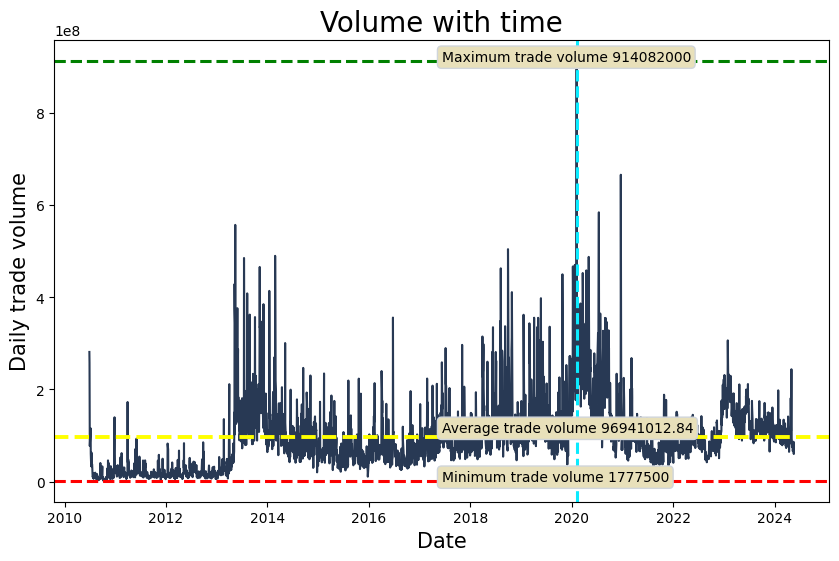

In [7]:
# x and y coords for average trade volume
ave_x = df['Date'].mean()
ave_y = df['Volume'].mean()
# y coord for max trade vol
max_y = df['Volume'].max()
# y coord for min trade vol
min_y = df['Volume'].min()

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df['Date'], df['Volume'], color='#283954')
ax.set_title("Volume with time", fontsize=20)
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Daily trade volume", fontsize=15)
ax.axhline(y=df['Volume'].max(), linestyle='--', lw=2.2, color='green')
ax.axhline(y=df['Volume'].min(), linestyle='--',lw=2.2, color='red')
ax.axhline(y=df['Volume'].mean(), linestyle='--',lw=2.8, color='yellow')
ax.axvline(x=df[df['Volume'] == max_y]['Date'].values, ls='--', lw='2.2', color='#0aebff')
ax.annotate(f"Average trade volume {round(df['Volume'].mean(),2)}",
                xy=(ave_x,ave_y),xytext=(ave_x,ave_y + 10000000),
                bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db')
                 )
ax.annotate(f"Maximum trade volume {df['Volume'].max()}",
                xy=(ave_x,max_y),xytext=(ave_x,max_y - 1000000),
                bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db')
                 )
ax.annotate(f"Minimum trade volume {df['Volume'].min()}",
                xy=(ave_x,min_y),xytext=(ave_x,min_y - 1000000),
                bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db')
                 )
plt.show()

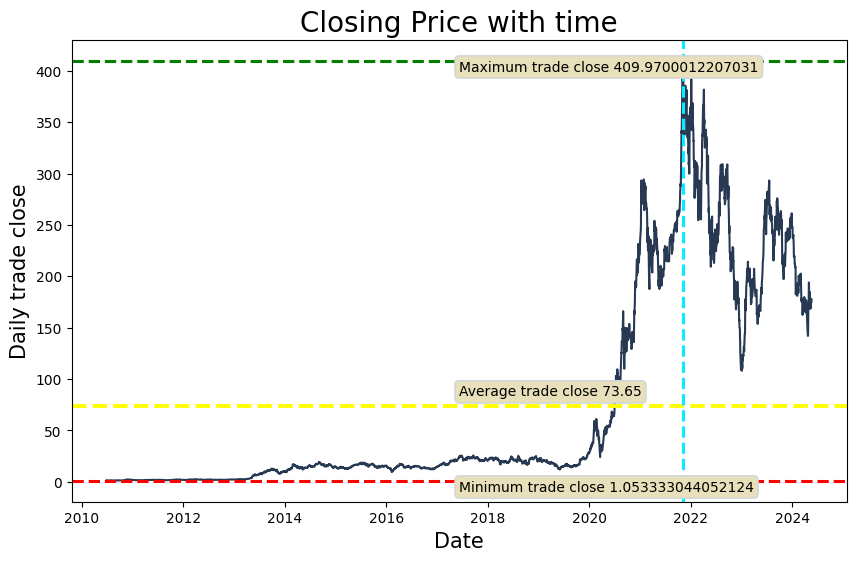

In [8]:
# x and y coords for average trade close
ave_x = df['Date'].mean()
ave_y = df['Close'].mean()
# y coord for max trade close
max_y = df['Close'].max()
# y coord for min trade close
min_y = df['Close'].min()

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df['Date'], df['Close'], color='#283954')
ax.set_title("Closing Price with time", fontsize=20)
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Daily trade close", fontsize=15)
ax.axhline(y=df['Close'].max(), linestyle='--', lw=2.2, color='green')
ax.axhline(y=df['Close'].min(), linestyle='--',lw=2.2, color='red')
ax.axhline(y=df['Close'].mean(), linestyle='--',lw=2.8, color='yellow')
ax.axvline(x=df[df['Close'] == max_y]['Date'].values, ls='--', lw='2.2', color='#0aebff')
ax.annotate(f"Average trade close {round(df['Close'].mean(),2)}",
                xy=(ave_x,ave_y),xytext=(ave_x,ave_y + 10),
                bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db')
                 )
ax.annotate(f"Maximum trade close {df['Close'].max()}",
                xy=(ave_x,max_y),xytext=(ave_x,max_y - 10),
                bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db')
                 )
ax.annotate(f"Minimum trade close {df['Close'].min()}",
                xy=(ave_x,min_y),xytext=(ave_x,min_y - 10),
                bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db')
                 )
plt.show()


## 2. Feature Engineering Module
<a id='2'></a>

In [9]:
import holidays
# Generate lagged variables
for lag in range(1, 8):  # 1 to 7 days lag
    datacopy[f'lag_{lag}'] = datacopy['Close'].shift(lag)

# Generate rolling statistics
datacopy['rolling_mean_7'] = datacopy['Close'].rolling(window=7).mean()
datacopy['rolling_std_7'] = datacopy['Close'].rolling(window=7).std()
datacopy['rolling_mean_30'] = datacopy['Close'].rolling(window=30).mean()
datacopy['rolling_std_30'] = datacopy['Close'].rolling(window=30).std()

# Generate holiday indicator
us_holidays = holidays.US()
datacopy['is_holiday'] = datacopy.index.to_series().apply(lambda x: 1 if x in us_holidays else 0)


datacopy.head()


,Open,High,Low,Close,Adj Close,Volume,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,rolling_mean_7,rolling_std_7,rolling_mean_30,rolling_std_30,is_holiday
Date,,,,,,,,,,,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,1.592667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,1.588667,1.592667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,1.464000,1.588667,1.592667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,1.280000,1.464000,1.588667,1.592667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [10]:
# Extract date features
datacopy['day_of_week'] = datacopy.index.dayofweek  # Monday=0, Sunday=6
datacopy['month'] = datacopy.index.month
datacopy['is_month_start'] = datacopy.index.is_month_start.astype(int)
datacopy['is_month_end'] = datacopy.index.is_month_end.astype(int)
datacopy['is_quarter_start'] = datacopy.index.is_quarter_start.astype(int)
datacopy['is_quarter_end'] = datacopy.index.is_quarter_end.astype(int)
datacopy['is_year_start'] = datacopy.index.is_year_start.astype(int)
datacopy['is_year_end'] = datacopy.index.is_year_end.astype(int)

# Weekend indicator
datacopy['is_weekend'] = datacopy['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

datacopy.head()


,Open,High,Low,Close,Adj Close,Volume,lag_1,lag_2,lag_3,lag_4,...,is_holiday,day_of_week,month,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend
Date,,,,,,,,,,,,,,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN,NaN,NaN,NaN,...,0,1,6,0,0,0,0,0,0,0
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,1.592667,NaN,NaN,NaN,...,0,2,6,0,1,0,1,0,0,0
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,1.588667,1.592667,NaN,NaN,...,0,3,7,1,0,1,0,0,0,0
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,1.464000,1.588667,1.592667,NaN,...,0,4,7,0,0,0,0,0,0,0
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,1.280000,1.464000,1.588667,1.592667,...,0,1,7,0,0,0,0,0,0,0


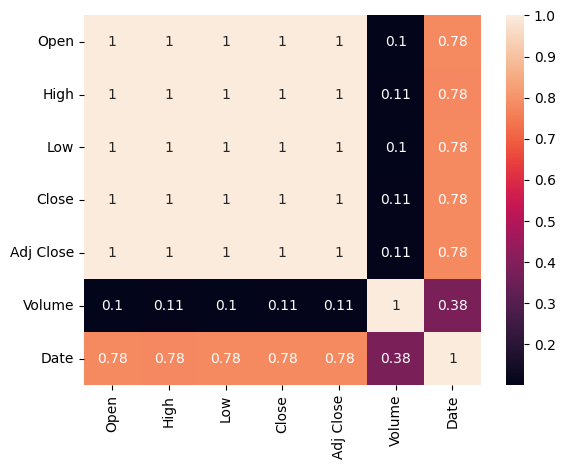

In [11]:
# Compute the correlation matrix
dataplot = sns.heatmap(df.corr(), annot=True) 


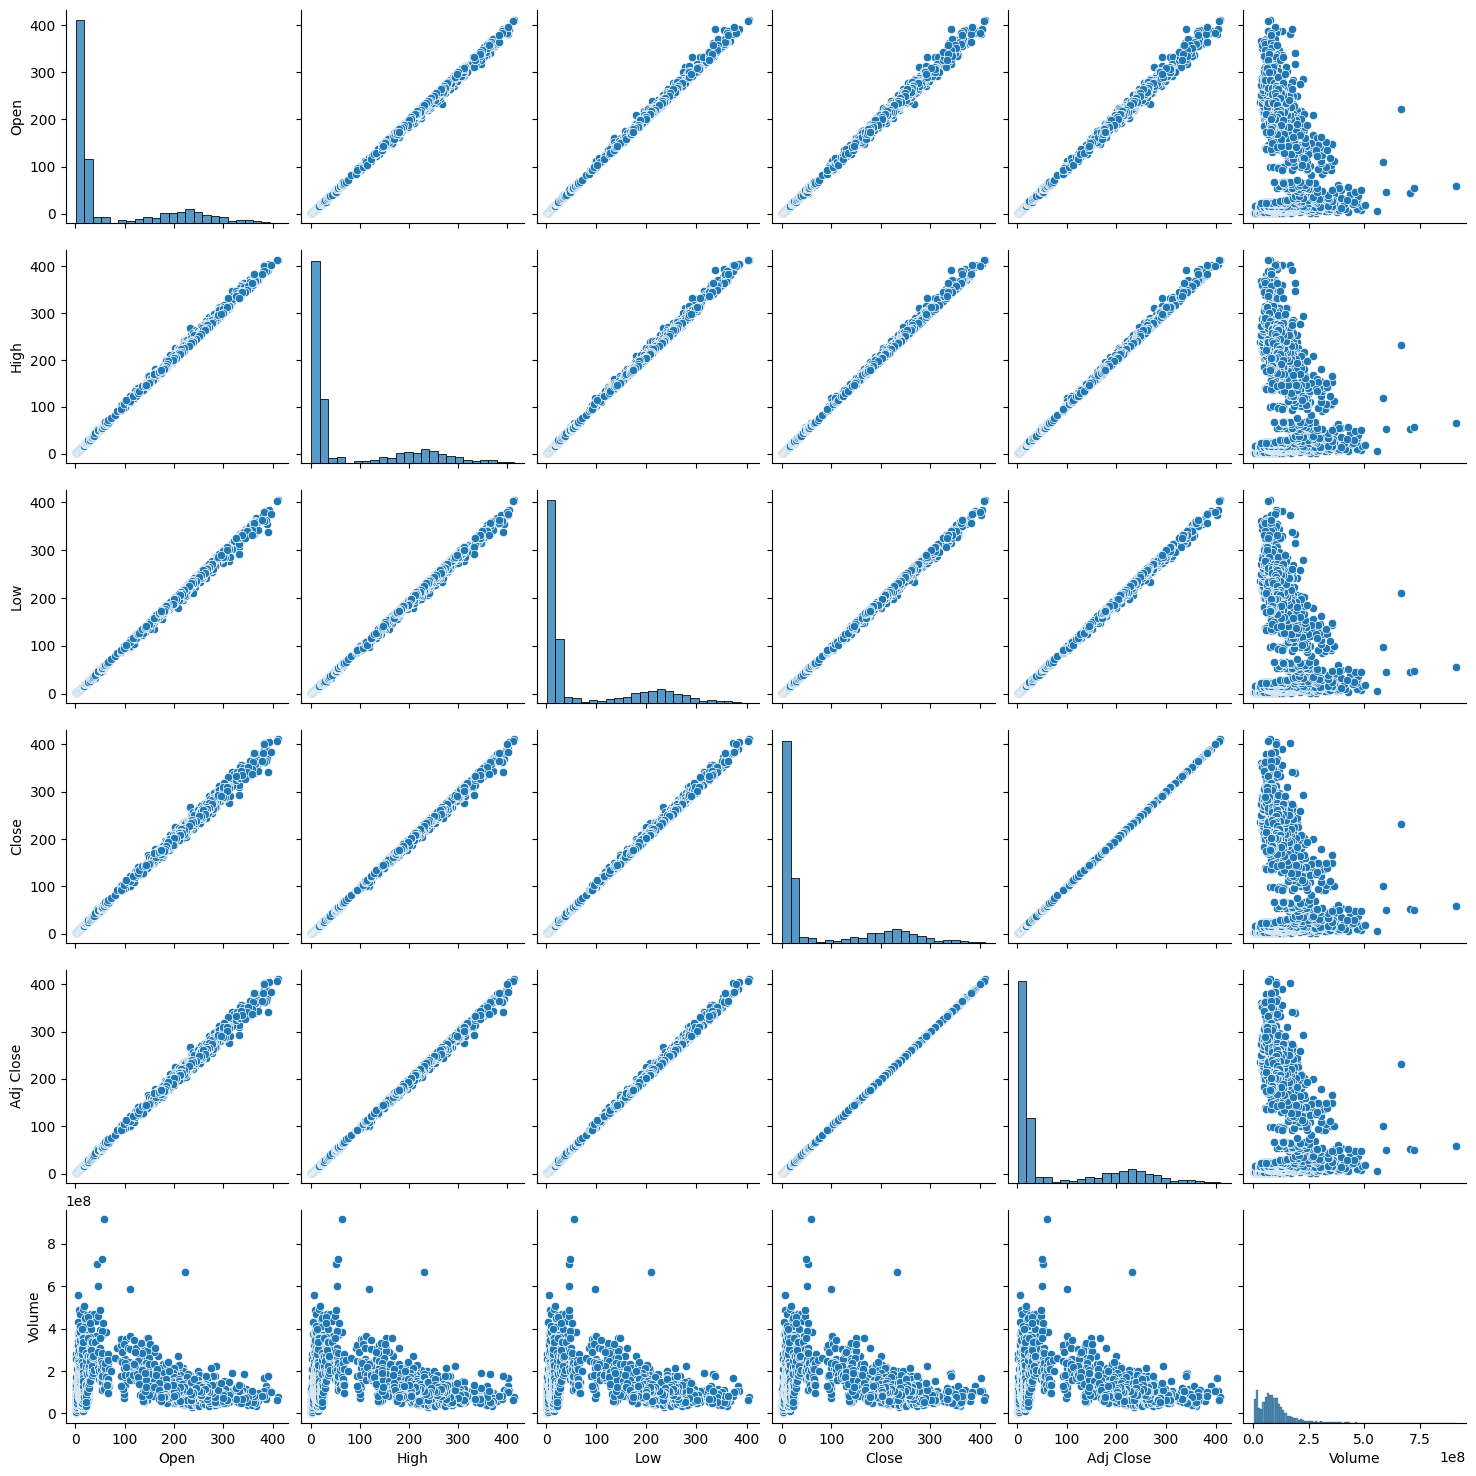

In [12]:
# pair plot
sns.pairplot(df)

Text(0, 0.5, 'Price difference')

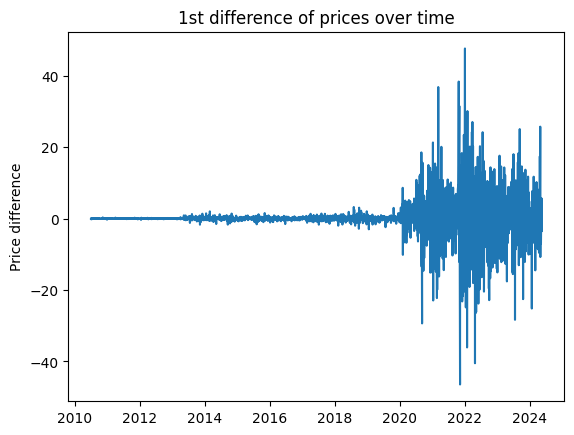

In [13]:
# for stationarity

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# 1st difference of closing values
df['Close1d']=np.concatenate([[0],np.diff(df.Close)])
plt.plot(df['Close1d'])
plt.title('1st difference of prices over time')
plt.ylabel('Price difference')

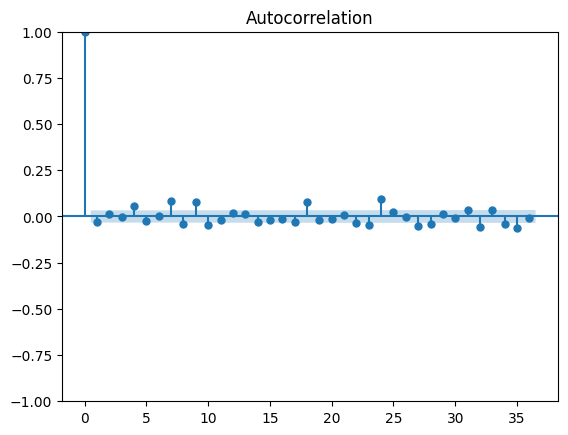

In [14]:
acf_plot=plot_acf(df.Close1d)

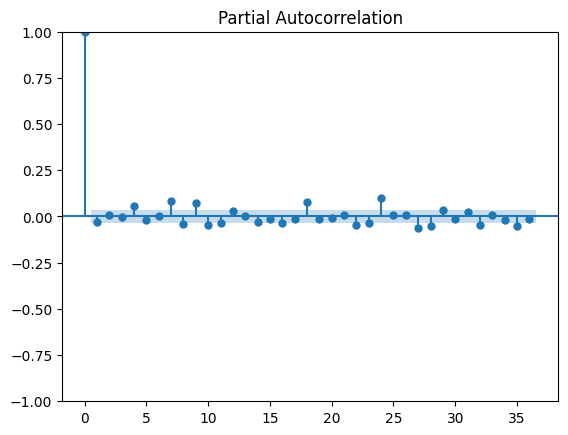

In [76]:
pacf_plot=plot_pacf(df.Close1d)

In [16]:
# Converting to date-time format with frequency information
data = df.asfreq(pd.infer_freq(df.index))
data.head()

,Open,High,Low,Close,Adj Close,Volume,Date,Close1d
Date,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500.0,2010-06-29,0.000000
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500.0,2010-06-30,-0.004000
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000.0,2010-07-01,-0.124667
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000.0,2010-07-02,-0.184000
2010-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN


In [45]:
# Extracting important features
data=pd.DataFrame(data.Close,data.index)
data.dropna(inplace=True)

# Saving the data as csv
data.to_csv(os.path.join('data/input',f'{ticker}processed.csv'),index=False)
data.head()

,Close
Date,
2010-06-29,1.592667
2010-06-30,1.588667
2010-07-01,1.464000
2010-07-02,1.280000
2010-07-06,1.074000


##   3. Model Development Module
<a id='3'></a>

In [46]:
from sklearn.model_selection import train_test_split
test_size=0.1

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.1, shuffle=False)

# Print the shapes of the training and testing sets
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)


Training data shape: (3146, 1)
Testing data shape: (350, 1)


## ARIMA

In [77]:
from statsmodels.tsa.arima.model import ARIMA
ARIMAmodel=None
# Define the ARIMA model
def arima_forecast(history):
    # Fit the model
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit()
    ARIMAmodel=model_fit
    # Make the prediction
    output = model_fit.forecast()
    yhat = output[0]
    return yhat

# Split data into train and test sets
train, test = train_data['Close'].values,test_data['Close'].values

# Walk-forward validation
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    # Generate a prediction
    yhat = arima_forecast(history)
    predictions.append(yhat)
    # Add  another value to the training set
    obs = test[t]
    history.append(obs)
test_data['ARIMAPredictions']=predictions

In [21]:
# Ensure the directory exists
model_dir = 'models/'
os.makedirs(model_dir, exist_ok=True)

# Ensure the directory exists
plot_dir = 'results/plots'
os.makedirs(plot_dir, exist_ok=True)

In [78]:
# Ensure the directory exists
model_dir = 'models/pre-trained models/'
os.makedirs(model_dir, exist_ok=True)

# Generate the file path
model_file_path = os.path.join(model_dir, f'{ticker}_arima.pkl')

# Save the model to disk
with open(model_file_path, 'wb') as f:
    pickle.dump(ARIMAmodel, f)


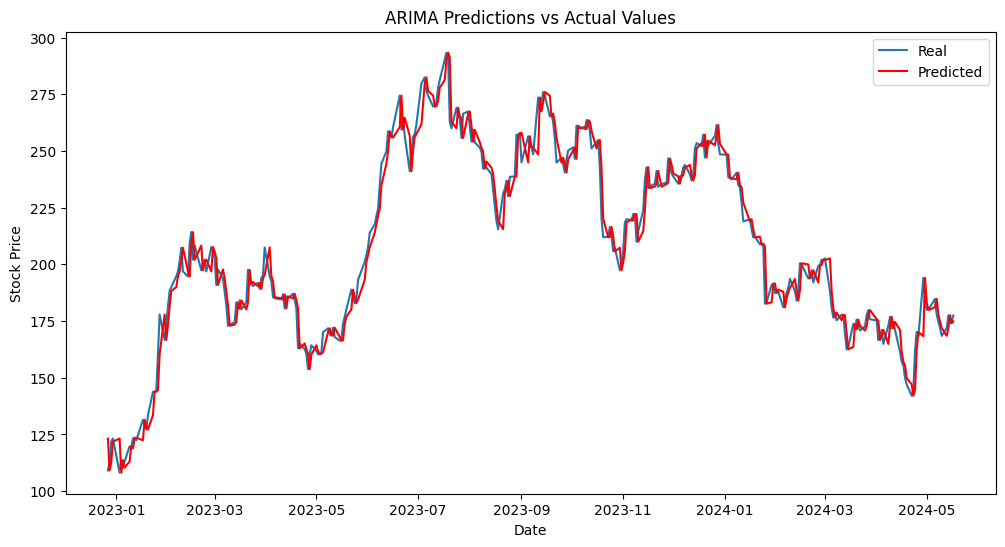

In [79]:
# Ensure the directory exists
plot_dir = 'results/plots'
os.makedirs(plot_dir, exist_ok=True)

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test_data.index,test_data.Close, label='Real')
plt.plot(test_data.index,test_data.ARIMAPredictions, color='red', label='Predicted')
plt.title('ARIMA Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

# Save the plot
plt.savefig(os.path.join(plot_dir, f'{ticker}_arima.png'))

plt.show()



## Simple Exponential Smoothing

In [80]:
from statsmodels.tsa.api import SimpleExpSmoothing
sesmodel=None
# Define the Exponential Smoothing model
def exp_smoothing_forecast(history):
    # Fit the model
    model = SimpleExpSmoothing(history)
    model_fit = model.fit()
    sesmodel=model_fit
    # Make the prediction
    yhat = model_fit.forecast(1)[0]
    return yhat

# Walk-forward validation
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    # Generate a prediction
    yhat = exp_smoothing_forecast(history)
    predictions.append(yhat)
    # Add another value to the training set
    obs = test[t]
    history.append(obs)

test_data['SESPredictions'] = predictions


In [81]:
# Generate the file path
model_file_path = os.path.join(model_dir, f'{ticker}_ses.pkl')

# Save the model to disk
with open(model_file_path, 'wb') as f:
    pickle.dump(sesmodel, f)

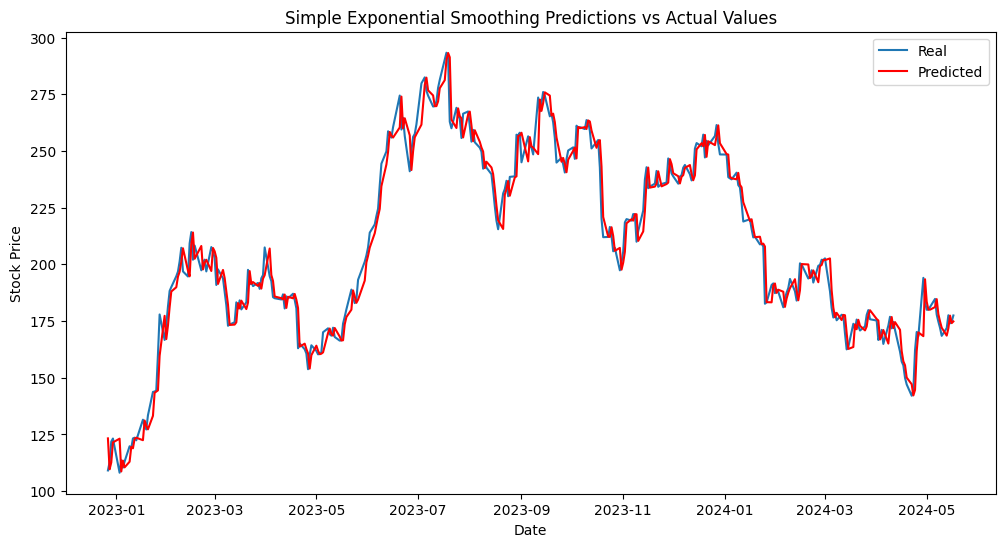

In [82]:
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test_data.index,test_data.Close, label='Real')
plt.plot(test_data.index,test_data.SESPredictions, color='red', label='Predicted')
plt.title('Simple Exponential Smoothing Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

# Save the plot
plt.savefig(os.path.join(plot_dir, f'{ticker}_ses.png'))

plt.show()

## Holt's Linear Exponetial Smoothing

In [83]:
from statsmodels.tsa.api import Holt
holtmodel=None
# Define the Holt's linear exponential smoothing model
def holt_linear_forecast(history):
    # Fit the model
    model = Holt(history)
    model_fit = model.fit()
    holtmodel=model_fit

    # Make the prediction
    yhat = model_fit.forecast(1)[0]
    return yhat

# Walk-forward validation
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    # Generate a prediction
    yhat = holt_linear_forecast(history)
    predictions.append(yhat)
    # Add another value to the training set
    obs = test[t]
    history.append(obs)

test_data['HoltzPredictions'] = predictions


In [84]:
# Generate the file path
model_file_path = os.path.join(model_dir, f'{ticker}_holt.pkl')

# Save the model to disk
with open(model_file_path, 'wb') as f:
    pickle.dump(holtmodel, f)

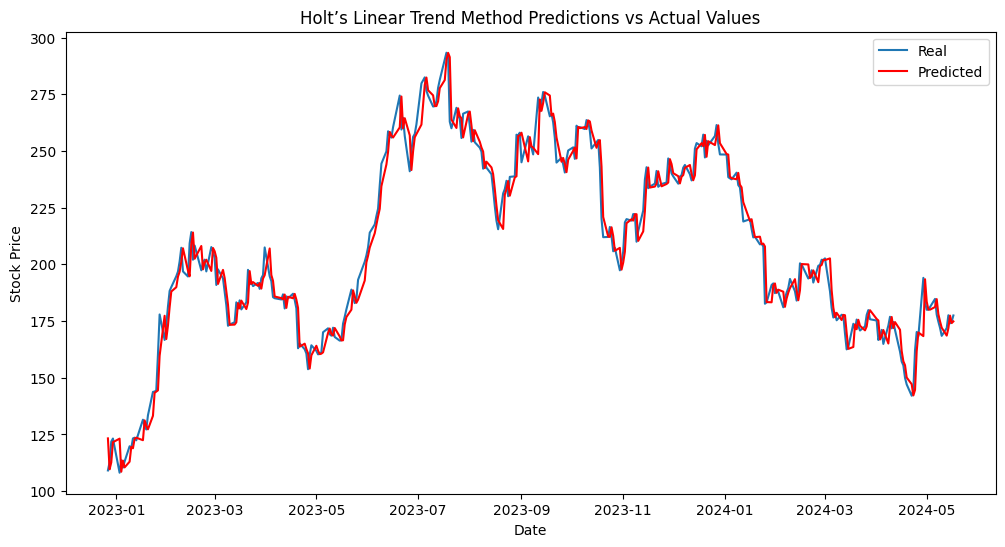

In [85]:
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test_data.index,test_data.Close, label='Real')
plt.plot(test_data.index,test_data.HoltzPredictions, color='red', label='Predicted')
plt.title('Holt’s Linear Trend Method Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

# Save the plot
plt.savefig(os.path.join(plot_dir, f'{ticker}_holt.png'))

plt.show()

## Prophet

In [ ]:
# import pandas as pd
# import numpy as np
# from prophet import Prophet

# Prophetmodel=None
# def make_stationary(data):
#     # Differencing to make the series stationary
#     data['y'] = data['y'].diff().dropna()
#     return data.dropna()

# def reverse_difference(original, diff_series):
#     # Reverses differencing to get back to original scale
#     return diff_series.cumsum() + original.iloc[0]

# def prophet_predictions(train, test):
#     # Make data stationary
#     train_stationary = make_stationary(train.copy())

#     # Instantiate the Prophet model
#     model = Prophet(
#         n_changepoints=310,
#         changepoint_prior_scale=0.01,
#         changepoint_range=0.5,
#         growth='linear',
#         seasonality_mode="multiplicative",
#         daily_seasonality=24,
#         weekly_seasonality=4
#     )

#     # Fit the model on the stationary data
#     model.fit(train_stationary[['ds', 'y']])
#     Prophetmodel=model

#     # Create future dates for the prediction period
#     future = model.make_future_dataframe(periods=len(test))

#     # Make predictions
#     forecast = model.predict(future)

#     # Extract the forecasted differenced values
#     forecast_diff = forecast[['ds', 'yhat']].tail(len(test))

#     # Reverse the differencing to obtain the original scale
#     forecast_diff['yhat'] = reverse_difference(train['y'].iloc[-1:], forecast_diff['yhat'])

#     return forecast_diff['yhat'].values

# # Prepare data
# data = pd.DataFrame({'ds': data.index, 'y': df['Close']})
# size = int(len(data) * 0.9)
# train, test = data.iloc[:size], data.iloc[size:]

# # Get the model's predicted price values
# prophet_pred = prophet_predictions(train, test)
# test_data['ProphetPredictions'] = prophet_pred


In [ ]:
# # Generate the file path
# model_file_path = os.path.join(model_dir, f'{ticker}_prophet.pkl')

# # Save the model to disk
# with open(model_file_path, 'wb') as f:
#     pickle.dump(Prophetmodel, f)

In [ ]:
# plt.figure(figsize=(12, 6), dpi=100)
# plt.plot(test_data.index,test_data['Close'], label='Real')
# plt.plot(test_data.index,test_data['ProphetPredictions'], color='red', label='Predicted')
# plt.title('Prophet Predictions vs Actual Values')
# plt.xlabel('Date')
# plt.ylabel('Stock Price')
# plt.legend()

# # Save the plot
# plt.savefig(os.path.join(plot_dir, f'{ticker}_prophet.png'))

# plt.show()

## Gradient Boosting - XGBoost

In [47]:
# Hyperparameter tuning for XGBoost
from bayes_opt import BayesianOptimization
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize model placeholder
xgbmodel = None

# Define the function to
# optimize with renamed parameter
def xgb_evaluate(eta, max_depth, min_child_weight, subsample, colsample_bytree, gamma, lambda_, alpha):
    params = {
        'eta': eta,
        'max_depth': int(max_depth),
        'min_child_weight': min_child_weight,
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'gamma': gamma,
        'lambda': lambda_,  # Use lambda_ here
        'alpha': alpha,
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'nthread': -1
    }
    # Perform cross-validation
    cv_result = xgb.cv(params, xgb.DMatrix(train_X, label=train_y), num_boost_round=100, nfold=3, metrics='rmse', early_stopping_rounds=10)
    return -cv_result['test-rmse-mean'].iloc[-1]

# Define the hyperparameter bounds with renamed parameter
pbounds = {
    'eta': (0.01, 0.3),
    'max_depth': (3, 10),
    'min_child_weight': (1, 10),
    'subsample': (0.5, 1.0),
    'colsample_bytree': (0.5, 1.0),
    'gamma': (0, 0.5),
    'lambda_': (0.5, 2.0),  # Rename lambda to lambda_
    'alpha': (0, 1.0)
}

# Assuming 'data' is a DataFrame with 'Close' column and DateTime index
X = pd.DataFrame({'ds': data.index, 'y': data['Close']})
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]

# Convert train and test data into arrays
train_X, train_y = train['ds'].values.astype(np.int64).reshape(-1, 1), train['y'].values
test_X, test_y = test['ds'].values.astype(np.int64).reshape(-1, 1), test['y'].values

# Perform Bayesian Optimization
optimizer = BayesianOptimization(f=xgb_evaluate, pbounds=pbounds, random_state=42)
optimizer.maximize(init_points=10, n_iter=50)

# Get the best parameters
best_params = optimizer.max['params']
best_params['max_depth'] = int(best_params['max_depth'])

# Print the best parameters
print("Best parameters found: ", best_params)


|   iter    |  target   |   alpha   | colsam... |    eta    |   gamma   |  lambda_  | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------------------------------------------
| 1         | -6.718    | 0.3745    | 0.9754    | 0.2223    | 0.2993    | 0.734     | 4.092     | 1.523     | 0.9331    |
| 2         | -23.09    | 0.6011    | 0.854     | 0.01597   | 0.485     | 1.749     | 4.486     | 2.636     | 0.5917    |
| 3         | -6.825    | 0.3042    | 0.7624    | 0.1353    | 0.1456    | 1.418     | 3.976     | 3.629     | 0.6832    |
| 4         | -7.739    | 0.4561    | 0.8926    | 0.06791   | 0.2571    | 1.389     | 3.325     | 6.468     | 0.5853    |
| 5         | -6.714    | 0.06505   | 0.9744    | 0.29      | 0.4042    | 0.9569    | 3.684     | 7.158     | 0.7201    |
| 6         | -15.39    | 0.122     | 0.7476    | 0.01997   | 0.4547    | 0.8882    | 7.638     | 3.805     | 0.76      |
| 7         | -6.625    

In [49]:
# Create the final model with the best parameters
best_xgb_model = xgb.XGBRegressor(
    eta=best_params['eta'],
    max_depth=best_params['max_depth'],
    min_child_weight=best_params['min_child_weight'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    gamma=best_params['gamma'],
    reg_lambda=best_params['lambda_'],  # Map lambda_ back to lambda
    reg_alpha=best_params['alpha'],
    objective='reg:squarederror',
    eval_metric='rmse',
    nthread=-1
)


# To store predictions
predictions = []

# Iterate through test data
for t in range(len(test_X)):
    # Generate a prediction
    yhat, xgbmodel = xgboost_forecast(train_X, train_y, np.array([test_X[t]]).reshape(-1, 1))
    predictions.append(yhat[0])
    # Add another value to the training set
    train_X = np.append(train_X, test_X[t]).reshape(-1, 1)
    train_y = np.append(train_y, test_y[t])

# Convert predictions to a DataFrame for easier handling (if needed)
import pandas as pd
test_data['XGBoostPredictions'] = predictions

print(test_data)



                 Close  XGBoostPredictions
Date                                      
2022-12-27  109.099998          154.814011
2022-12-28  112.709999          149.782135
2022-12-29  121.820000          145.445374
2022-12-30  123.180000          141.753281
2023-01-03  108.099998          137.704346
...                ...                 ...
2024-05-13  171.889999          170.650955
2024-05-14  177.550003          172.493774
2024-05-15  173.990005          174.655899
2024-05-16  174.839996          175.387726
2024-05-17  177.460007          175.595932

[350 rows x 2 columns]
Model parameters: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.9, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 

In [51]:
# Generate the file path
model_file_path = os.path.join(model_dir, f'{ticker}_xgboost.pkl')

# Save the model to disk
with open(model_file_path, 'wb') as f:
    pickle.dump(xgbmodel, f)

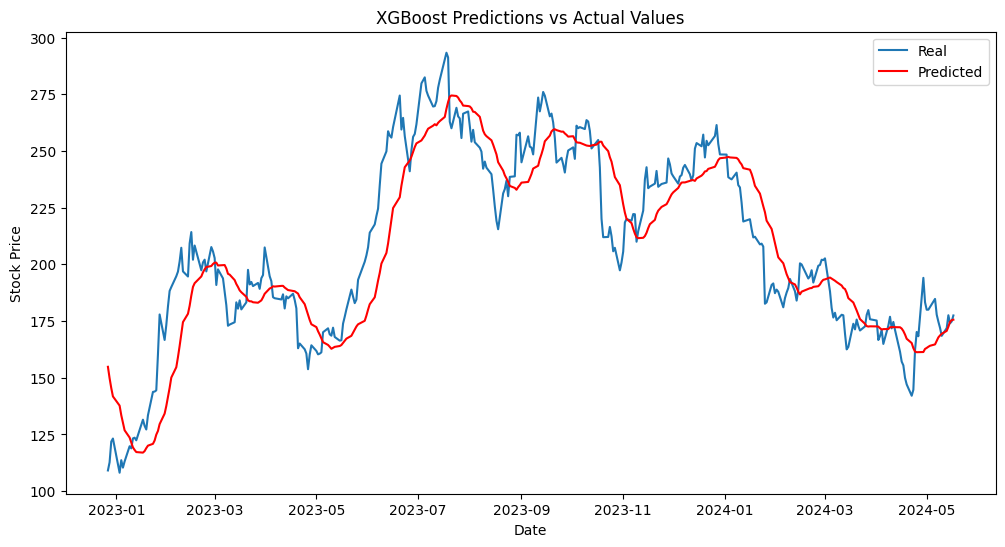

In [50]:
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test_data.index,test_data.Close, label='Real')
plt.plot(test_data.index,test_data.XGBoostPredictions, color='red', label='Predicted')
plt.title('XGBoost Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

# Save the plot
plt.savefig(os.path.join(plot_dir, f'{ticker}_xgboost.png'))
plt.show()

## LSTM

Trial 5 Complete [00h 00m 48s]
val_loss: 0.0021136535797268152

Best val_loss So Far: 0.00198383373208344
Total elapsed time: 00h 02m 17s
Epoch 1/5


c:\Users\Swapn\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


3086/3086 ━━━━━━━━━━━━━━━━━━━━ 86s 27ms/step - loss: 0.0023
Epoch 2/5
3086/3086 ━━━━━━━━━━━━━━━━━━━━ 84s 27ms/step - loss: 3.6586e-04
Epoch 3/5
3086/3086 ━━━━━━━━━━━━━━━━━━━━ 85s 27ms/step - loss: 7.9044e-04
Epoch 4/5
3086/3086 ━━━━━━━━━━━━━━━━━━━━ 85s 27ms/step - loss: 4.6107e-04
Epoch 5/5
3086/3086 ━━━━━━━━━━━━━━━━━━━━ 85s 28ms/step - loss: 4.2757e-04


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


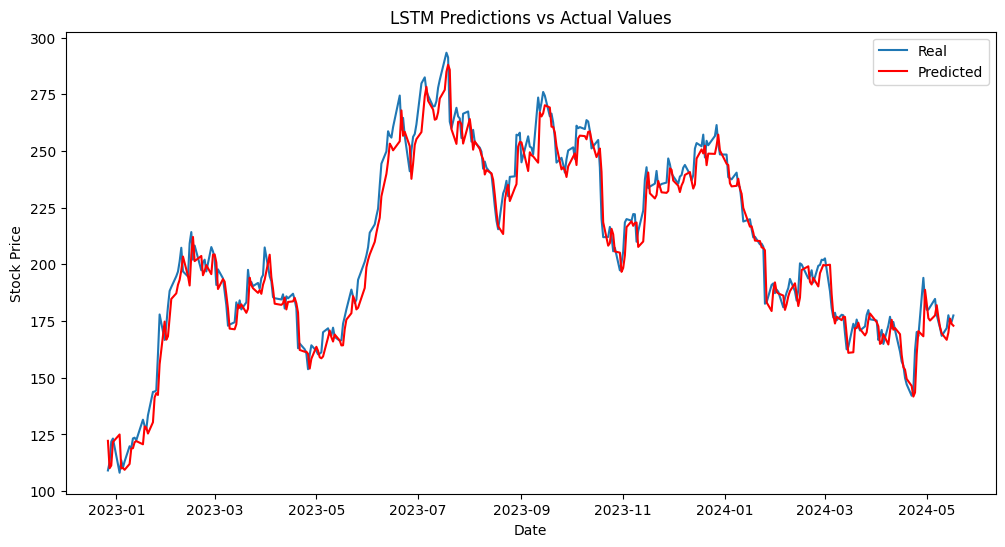

In [73]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from keras_tuner import HyperModel, RandomSearch

# Assuming 'data' and 'ticker' are defined
# Assuming 'model_dir' and 'plot_dir' are defined

# Create a new dataframe with only the 'Close' column
dataset = data.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = dataset.values

# Get the number of rows to train the model on
training_data_len = int(np.floor(len(dataset) * .9))

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create the training data set
traindata = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(traindata)):
    x_train.append(traindata[i - 60:i, 0])
    y_train.append(traindata[i, 0])

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Define the hypermodel for tuning
class LSTMHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()
        model.add(LSTM(units=hp.Int('units', min_value=32, max_value=256, step=32),
                       return_sequences=True,
                       input_shape=self.input_shape))
        model.add(LSTM(units=hp.Int('units', min_value=32, max_value=256, step=32),
                       return_sequences=False))
        model.add(Dense(units=hp.Int('units', min_value=32, max_value=256, step=32)))
        model.add(Dense(units=1))
        model.compile(optimizer='adam', loss='mean_squared_error')
        return model

# Define hyperparameters for tuning
input_shape = (x_train.shape[1], 1)
hypermodel = LSTMHyperModel(input_shape)

# Perform random search for hyperparameter tuning
tuner = RandomSearch(
    hypermodel,
    objective='val_loss',
    max_trials=5,  # Adjust this based on computational resources and desired tuning
    executions_per_trial=1,
    directory='my_dir',
    project_name='lstm_hyperparameter_tuning')

# Start hyperparameter search
tuner.search(x_train, y_train,
             epochs=5,  # Adjust as needed
             validation_split=0.1)  # Adjust validation split as needed

# Get best model
best_model = tuner.get_best_models(num_models=1)[0]

# Train the best model
best_model.fit(x_train, y_train, epochs=5, batch_size=1)  # Adjust epochs and batch size as needed

# Save the best model to disk
best_model_file_path = os.path.join(model_dir, f'{ticker}_best_lstm.h5')
best_model.save(best_model_file_path)

# Create the testing data set
testdata = scaled_data[training_data_len - 60:, :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(testdata)):
    x_test.append(testdata[i - 60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
LSTMpredictions = best_model.predict(x_test)
LSTMpredictions = scaler.inverse_transform(LSTMpredictions)

# Get the root mean squared error (RMSE)
rmse6 = np.sqrt(np.mean(((LSTMpredictions - y_test) ** 2)))

# Add predictions to the test_data DataFrame
test_data['LSTMPredictions'] = LSTMpredictions

# Plotting
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test_data.index, test_data['Close'], label='Real')
plt.plot(test_data.index, test_data['LSTMPredictions'], color='red', label='Predicted')
plt.title('LSTM Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

# Save the plot
plt.savefig(os.path.join(plot_dir, f'{ticker}_lstm.png'))

plt.show()


## Model Performance Estimation (RMSE,MAE,MAPE)

In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#RMSE (Root Mean Square Error), MAE (Mean Absolute Error), and MAPE (Mean Absolute Percentage Error)
# Dictionary to store results
results = {}

# List of model columns
model_columns = ["ARIMAPredictions", "SESPredictions", "HoltzPredictions", "XGBoostPredictions", "LSTMPredictions" ]#"ProphetPredictions"]

# True values
true_values = test_data["Close"]

# Evaluate each model
for model in model_columns:
    predictions = test_data[model]

    rmse = np.sqrt(mean_squared_error(true_values, predictions))
    mae = mean_absolute_error(true_values, predictions)
    mape = mean_absolute_percentage_error(true_values, predictions)

    results[model] = {'RMSE': rmse, 'MAE': mae, 'MAPE': mape}

# Print results
for model, metrics in results.items():
    print(f"Model: {model}")
    print(f"  RMSE: {metrics['RMSE']:.4f}")
    print(f"  MAE: {metrics['MAE']:.4f}")
    print(f"  MAPE: {metrics['MAPE']:.2f}%\n")

Model: ARIMAPredictions
  RMSE: 6.9227
  MAE: 5.1553
  MAPE: 2.57%

Model: SESPredictions
  RMSE: 6.9308
  MAE: 5.1547
  MAPE: 2.56%

Model: HoltzPredictions
  RMSE: 6.9336
  MAE: 5.1560
  MAPE: 2.57%

Model: XGBoostPredictions
  RMSE: 17.9235
  MAE: 14.2258
  MAPE: 7.14%

Model: LSTMPredictions
  RMSE: 7.6349
  MAE: 5.8198
  MAPE: 2.85%

